In [1]:
import pandas as pd

In [2]:
df_cust=pd.read_csv("customers.csv")

In [3]:
df_trans=pd.read_csv("transactions.csv")

In [4]:
df_cs=pd.read_csv("credit_profiles.csv")

In [5]:
df_trans.shape

(500000, 7)

In [6]:
# Handling null values

In [7]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [8]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [9]:
df_cust.annual_income.mean()

139410.31473684212

In [10]:
# we will replace null values with median as per thire ocuupation

In [11]:
df_cust[df_cust.occupation=="Artist"].annual_income.median()

45794.0

In [12]:
occupation_wise_inc_median = df_cust.groupby("occupation")["annual_income"].median() 
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [13]:
occupation_wise_inc_median['Artist']

45794.0

In [14]:
# same for every occupation using lambda function

In [15]:
df_cust["annual_income"] = df_cust.apply( 
    lambda row: occupation_wise_inc_median [row['occupation']] if pd.isnull(row["annual_income"]) else row['annual_income'] 
    ,axis=1 )

In [16]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

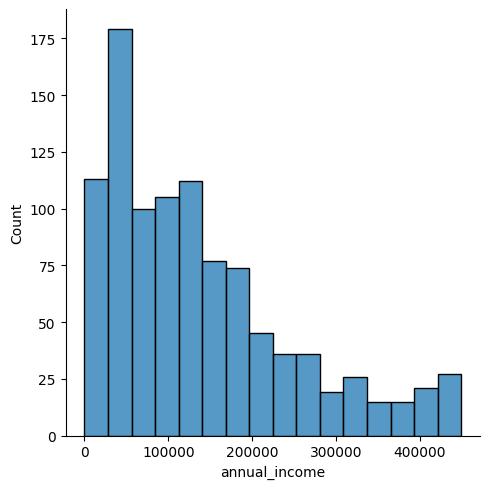

In [18]:
# Distribution plot 
sns.displot(data=df_cust.annual_income)

In [19]:
 # As we can see above data is right skewed which is expected for income

Outlier detection and removal

In [21]:
# let find out inconce below 100$
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [22]:
df_cust.at[5,"annual_income"] # at is used to print value at perticualr index in column

44887.0

In [23]:
for index,row in df_cust.iterrows():     # we will itreate to each row
    if row["annual_income"] <100:
        df_cust.at[index, "annual_income"] = occupation_wise_inc_median [row["occupation"]]
# Using this we will replace values with occupation medain whose sal less than 100        

In [24]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


Data Visulization

In [26]:
occupation_wise_inc_mean = df_cust.groupby("occupation")["annual_income"].mean() 
occupation_wise_inc_mean

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

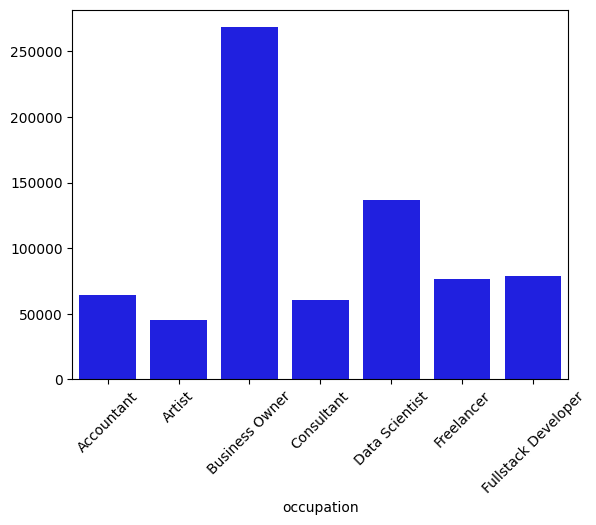

In [27]:
sns.barplot(x=occupation_wise_inc_mean.index,y=occupation_wise_inc_mean.values,color='b')
plt.xticks(rotation=45) # to rotate names at x-axis by 45 degree
plt.show()

/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/1790311944.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/1790311944.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/1790311944.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/1790311944.py:19

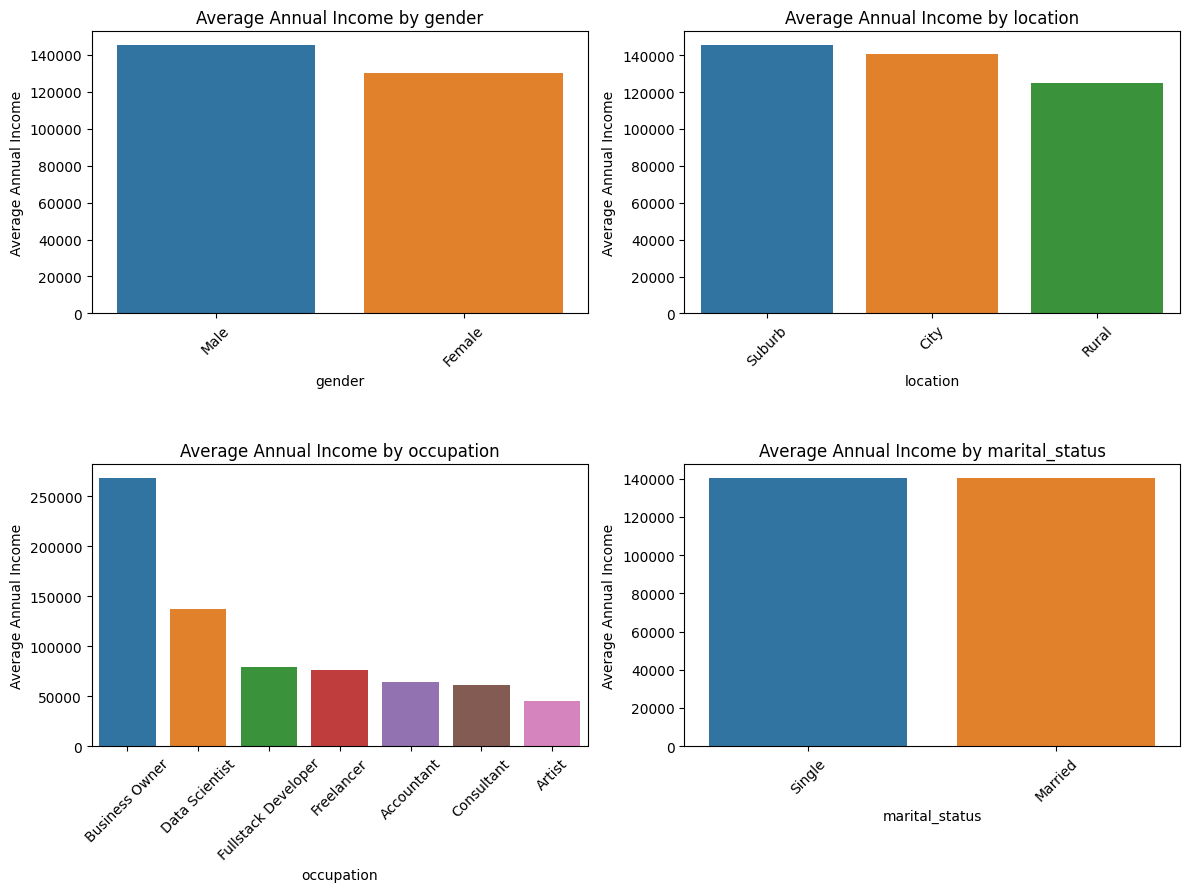

In [28]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)
    
    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [29]:
# Removing outlier in age column

In [30]:
outliers=df_cust[(df_cust.age<15)|(df_cust.age>80)]

In [31]:
df_cust.age.median()

32.0

In [32]:
occupation_wise_median_age = df_cust.groupby("occupation")["age"].median() 
occupation_wise_median_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [33]:
for index,row in outliers.iterrows():     # we will itreate to each row
    df_cust.at[index, "age"] = occupation_wise_median_age [row["occupation"]]

/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/1340317701.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cust.at[index, "age"] = occupation_wise_median_age [row["occupation"]]


In [34]:
df_cust[(df_cust.age<15)|(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


Data Visulization for age gender and location

In [36]:
# Define the bin edges and Labels 
bin_edges = [17, 25, 48, 65] # Adjust as needed 
bin_labels = ['18-25', '26-48', '49-65'] # Use the cut function to bin and Label the age column 
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels) 
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [37]:
# Above we added column for age group 

In [38]:
age_group_count=df_cust.age_group.value_counts(normalize=True)*100 # To get value count for each age group, noram *100 is to convert it nto percentage
age_group_count

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

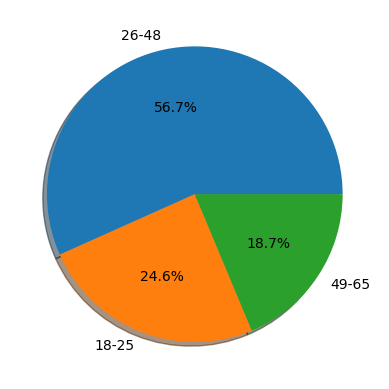

In [39]:
plt.pie(
    age_group_count,
    labels=age_group_count.index,
    autopct='%1.1f%%',
    shadow=True)
plt.show()

In [40]:
customer_location_gender=df_cust.groupby(['location','gender']).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


<Axes: xlabel='location'>

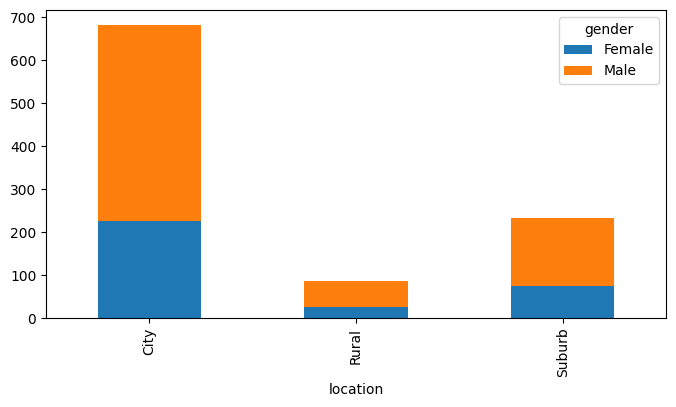

In [41]:
# We can plot bar chart in this way as well
customer_location_gender.plot(kind="bar",stacked=True,figsize=(8,4))

Explore Credit Scores

In [43]:
# Finding duplicate customer id's
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [44]:
# Let's drop duplicates
df_cs_clean1=df_cs.drop_duplicates(subset=['cust_id'],keep="last")
df_cs_clean1

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [45]:
df_cs_clean1[df_cs_clean1['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [46]:
df_cs_clean1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/671026746.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


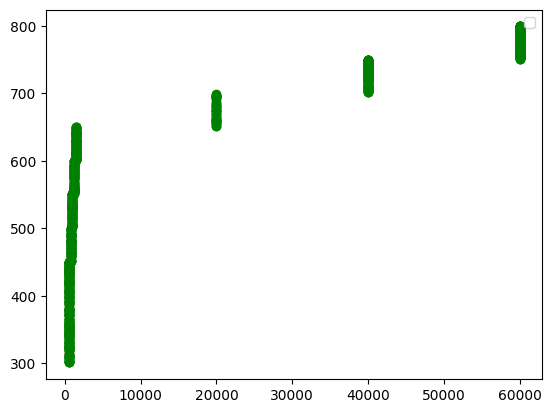

In [47]:
plt.scatter(df_cs_clean1.credit_limit,df_cs_clean1.credit_score,color='g')
plt.legend()
plt.show()

In [48]:
# Creating groups for credit score
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800] 
bin_labels = [f'{start}-{end-1}' for start, end in zip (bin_ranges, bin_ranges [1:])]
bin_labels

['300-449',
 '450-499',
 '500-549',
 '550-599',
 '600-649',
 '650-699',
 '700-749',
 '750-799']

In [49]:
df_cs_clean1['credit_score_range']=pd.cut(df_cs_clean1['credit_score'],bins=bin_ranges,labels=bin_labels,include_lowest=True,right=False)

/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/1832207101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_clean1['credit_score_range']=pd.cut(df_cs_clean1['credit_score'],bins=bin_ranges,labels=bin_labels,include_lowest=True,right=False)


In [50]:
df_cs_clean1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [51]:
mode_df=df_cs_clean1.groupby("credit_score_range")["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/1695654465.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_df=df_cs_clean1.groupby("credit_score_range")["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index()


,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [52]:
df_cs_clean1[df_cs_clean1.credit_limit.isnull()].head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
10,11,679,0.557450,9187.0,2.0,NaN,650-699
35,36,790,0.112535,4261.0,1.0,NaN,750-799
37,38,514,0.296971,238.0,2.0,NaN,500-549
45,46,761,0.596041,24234.0,2.0,NaN,750-799
64,65,734,0.473715,13631.0,0.0,NaN,700-749


In [53]:
# we will these null value in credit limt by mode_df

In [54]:
pd.merge(df_cs_clean1,mode_df,on="credit_score_range") # WE will merge to datafarme on credit_score_range like we do in sq

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit_x,credit_score_range,credit_limit_y
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
995,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [55]:
# As we see after merginif we got credit_limit_x and credit_limit_y which we don't want, so we add suffix
df_cs_clean2=pd.merge(df_cs_clean1,mode_df,on="credit_score_range",suffixes=("","_mode"))
df_cs_clean2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
472,473,437,0.457461,179.0,2.0,500.0,300-449,500.0
335,336,758,0.676826,25089.0,3.0,60000.0,750-799,60000.0
820,821,426,0.578425,177.0,3.0,NaN,300-449,500.0


In [56]:
df_cs_clean2[df_cs_clean2.credit_limit.isnull()].head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
10,11,679,0.557450,9187.0,2.0,NaN,650-699,20000.0
35,36,790,0.112535,4261.0,1.0,NaN,750-799,60000.0
37,38,514,0.296971,238.0,2.0,NaN,500-549,1000.0
45,46,761,0.596041,24234.0,2.0,NaN,750-799,60000.0
64,65,734,0.473715,13631.0,0.0,NaN,700-749,40000.0


In [57]:
df_cs_clean2['credit_limit'].fillna(df_cs_clean2['credit_limit_mode'],inplace=True) #we will fill na with credit limit mode

/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/4270953714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cs_clean2['credit_limit'].fillna(df_cs_clean2['credit_limit_mode'],inplace=True) #we will fill na with credit limit mode


In [58]:
df_cs_clean2[df_cs_clean2.credit_limit.isnull()].head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [59]:
df_cs_clean3=df_cs_clean2.copy()

In [60]:
df_cs_clean3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


<Axes: ylabel='outstanding_debt'>

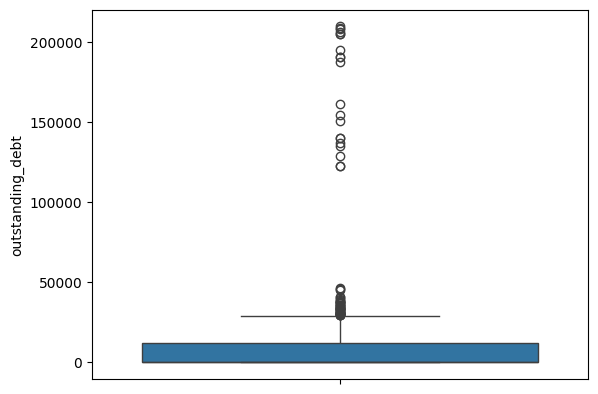

In [61]:
sns.boxplot(df_cs_clean3.outstanding_debt)

In [62]:
# we  know in our data max credit limit is 60000, outstanding above that we can treat as a outliers

In [63]:
df_cs_clean3[df_cs_clean3.outstanding_debt>df_cs_clean3.credit_limit].shape


(20, 8)

In [64]:
# we replace outstanding_debt above credit limit with credit limit 
df_cs_clean3.loc[df_cs_clean3.outstanding_debt>df_cs_clean3.credit_limit,'outstanding_debt']=df_cs_clean3['credit_limit']
df_cs_clean3

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
995,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [65]:
df_cs_clean3[df_cs_clean3.outstanding_debt>df_cs_clean3.credit_limit].shape

(0, 8)

Correlation Finding 

In [67]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [68]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [69]:
# We will merge cutomer and credit profile dataframe 
df_merged = pd.merge(df_cust, df_cs, on='cust_id', how='inner')
df_merged.shape 

(1004, 14)

In [70]:
# Let's check correlation using inbuild method corr
df_merged[['credit_score','credit_limit']].corr()

,credit_score,credit_limit
credit_score,1.000000,0.844279
credit_limit,0.844279,1.000000


In [71]:
# Similarly we do for all numric columns
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']
correlation_matrix=df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.306026,0.844279,0.575610,0.445136
credit_utilisation,-0.070445,1.000000,0.046540,-0.084046,-0.086368,-0.027713
outstanding_debt,0.306026,0.046540,1.000000,0.361906,0.276196,0.247933
credit_limit,0.844279,-0.084046,0.361906,1.000000,0.682402,0.518326
annual_income,0.575610,-0.086368,0.276196,0.682402,1.000000,0.619373
age,0.445136,-0.027713,0.247933,0.518326,0.619373,1.000000


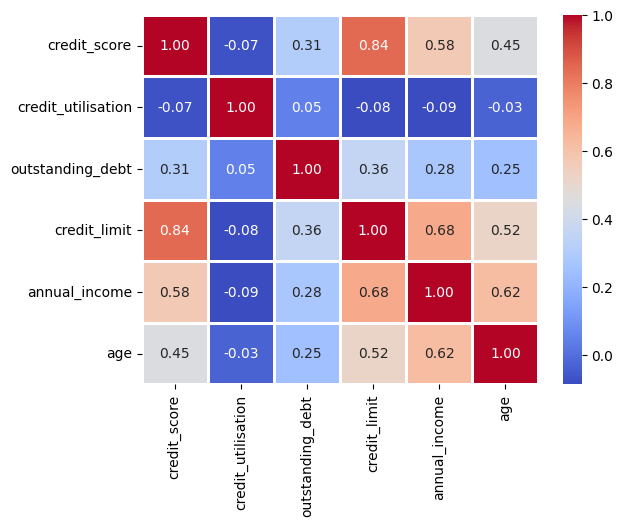

In [72]:
# We can visulize this using hitmap
sns.heatmap(correlation_matrix,annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8)
plt.show()

Transaction Table

In [74]:
# Let's handle null values in df_trans

In [75]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [76]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [77]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [78]:
df_trans.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [79]:
df_trans.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='product_category'>

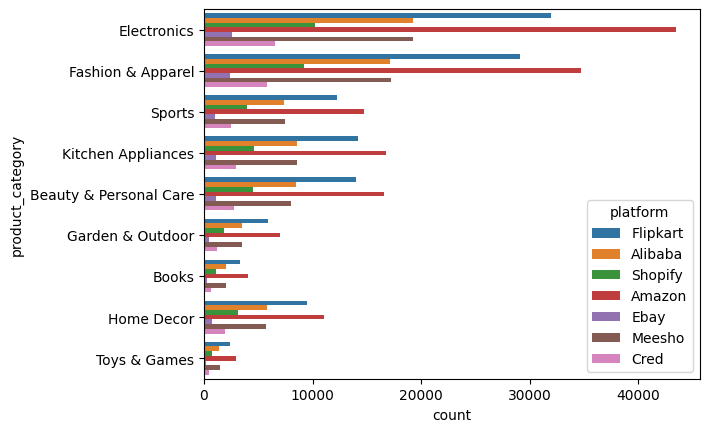

In [80]:
sns.countplot(y="product_category", hue="platform", data=df_trans)

In [81]:
# As we can see the most used platform is amazon so we will repalce null values with mode, which is amzon

In [82]:
df_trans.platform.fillna(df_trans.platform.mode()[0],inplace=True)

/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/2724666882.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans.platform.fillna(df_trans.platform.mode()[0],inplace=True)


In [83]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [84]:
# As our project requirement transaction amount can not be zero we have handle that as well

In [85]:
df_zero_trans=df_trans[df_trans.tran_amount==0]
df_zero_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [86]:
# let's check what else values we have as platform as amzon and category electronics, because for this only we have null values

df_trans_1 = df_trans[(df_trans. platform == 'Amazon') & (df_trans.product_category== "Electronics") & (df_trans.payment_type== "Credit Card")]
df_trans_1.head()

                                                                                                                             

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [87]:
# we will meadin of above data to replace with 0
median_replace=df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()
median_replace

554.0

In [88]:
df_trans['tran_amount'].replace(0,median_replace,inplace=True)

/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/3867098013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans['tran_amount'].replace(0,median_replace,inplace=True)


<Axes: xlabel='tran_amount', ylabel='Count'>

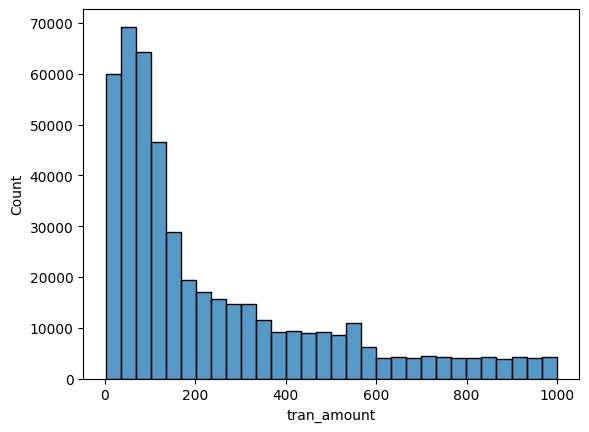

In [89]:
sns.histplot(df_trans[df_trans.tran_amount<1000].tran_amount,bins=30)

In [90]:
# As we can see our data is right sckwed

In [91]:
# we use IQR to fix this

In [92]:
Q1, Q3 = df_trans['tran_amount'].quantile ([0.25, 0.75]) 
IQR = Q3 - Q1 
lower = Q1 - 2*IQR 
upper = Q3 + 2*IQR 
lower, upper

(-628.0, 1107.0)

In [93]:
# We will consider upper limit only because transaction can't be negative
df_trans_outlier=df_trans[df_trans.tran_amount>upper]

In [94]:
df_trans_outlier.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card


In [95]:
df_trans_noraml=df_trans[df_trans.tran_amount<upper]
df_trans_noraml.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [96]:
df_trans_noraml_mean=df_trans_noraml.groupby("product_category")["tran_amount"].mean()

In [97]:
df_trans.loc[df_trans_outlier.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [98]:
# Replacing outliers with mean df_trans_noraml
df_trans.loc[df_trans_outlier.index, 'tran_amount'] = df_trans_outlier['product_category'].map(df_trans_noraml_mean)

/var/folders/gn/msf4ty3s5j30lw19_2_v3dq40000gn/T/ipykernel_11265/904439668.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 92.16720517  50.33329759 176.77328782 ... 269.18163136 269.18163136
  64.55346325]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_trans.loc[df_trans_outlier.index, 'tran_amount'] = df_trans_outlier['product_category'].map(df_trans_noraml_mean)


<Axes: xlabel='tran_amount', ylabel='Count'>

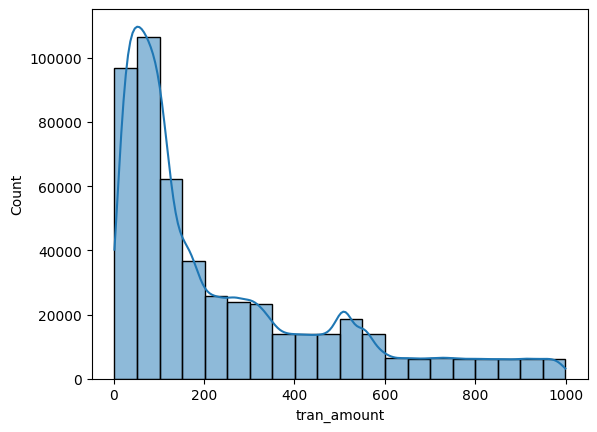

In [99]:
sns.histplot(df_trans[df_trans.tran_amount<1000].tran_amount,bins=20,kde=True)

In [100]:
# AS we can see now it's look much better

Visulization

<Axes: xlabel='payment_type', ylabel='count'>

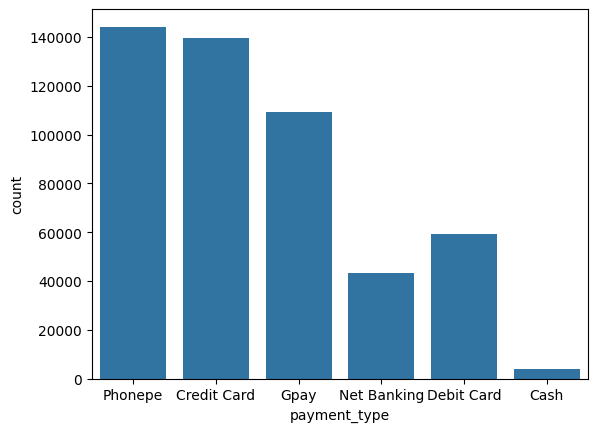

In [102]:
sns.countplot(x=df_trans.payment_type)

In [103]:
# We have to distribute payment methods as age category so let's merge transaction and customer data

In [104]:
df_trans.shape

(500000, 7)

In [105]:
df_merged.shape

(1004, 14)

In [106]:
df_merged2=pd.merge(df_merged,df_trans,on="cust_id",how="inner")
df_merged2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


In [107]:
df_merged2.shape

(502079, 20)

<Axes: xlabel='age_group', ylabel='count'>

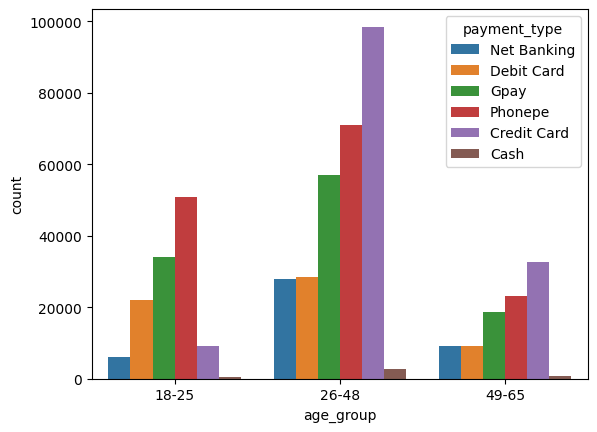

<Axes: xlabel='age_group', ylabel='count'>

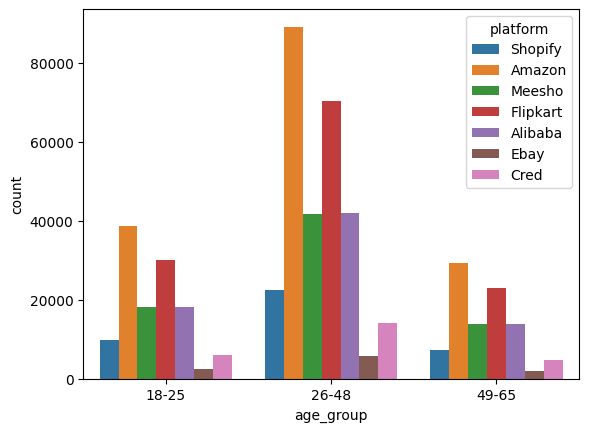

In [220]:

sns.countplot(x='age_group',hue='platform',data=df_merged2)

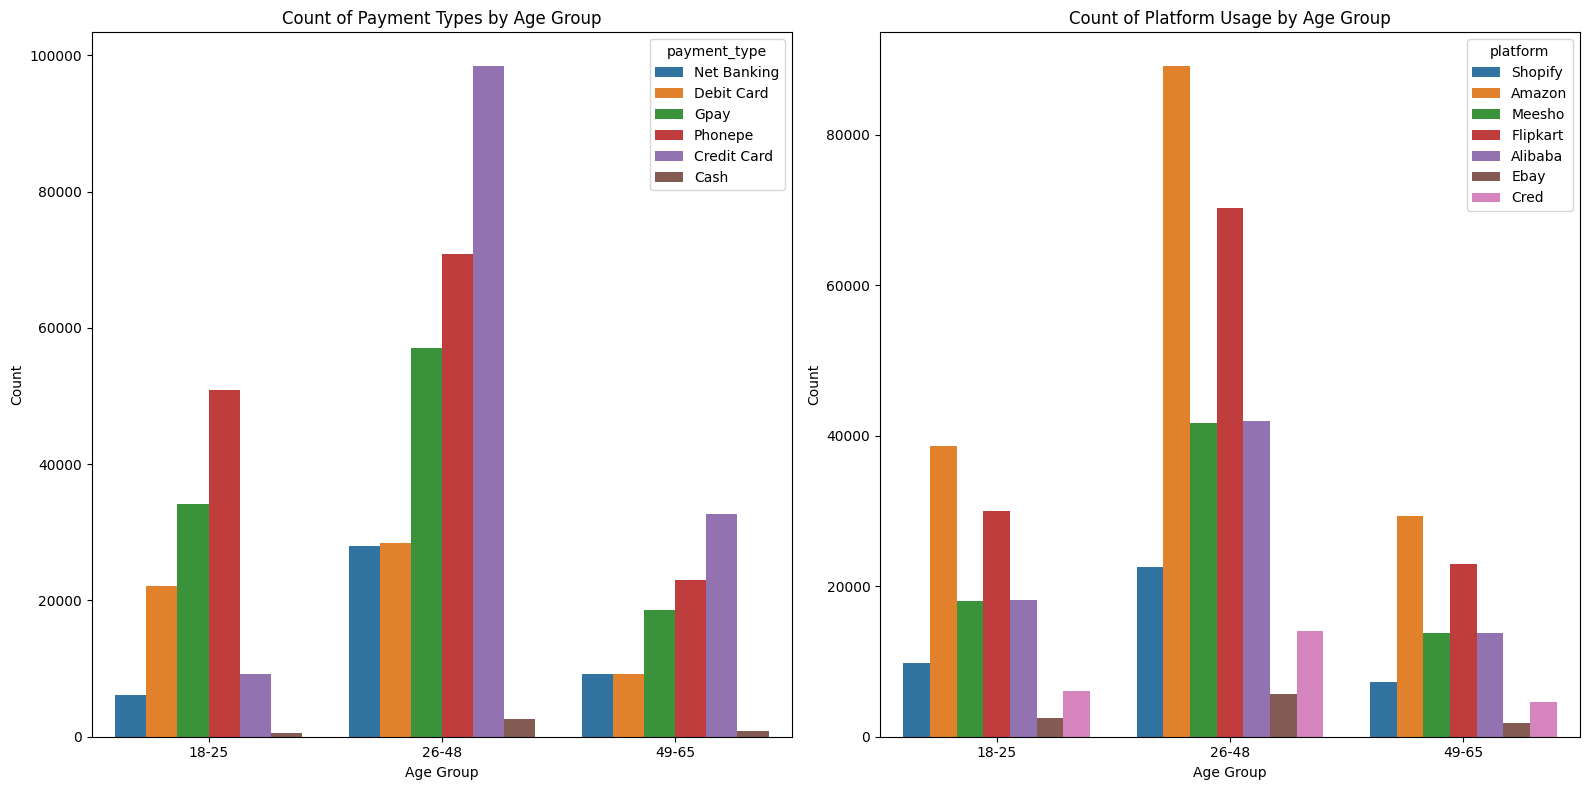

In [224]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first countplot on the first subplot
sns.countplot(x='age_group', hue='payment_type', data=df_merged2, ax=axes[0])
axes[0].set_title('Count of Payment Types by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Plot the second countplot on the second subplot
sns.countplot(x='age_group', hue='platform', data=df_merged2, ax=axes[1])
axes[1].set_title('Count of Platform Usage by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()
